In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import requests
import json
from geopy.distance import geodesic

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor
from sklearn import preprocessing

from scipy import stats
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
import xgboost as xgb 

In [24]:
hdb_latest_df = pd.read_csv("final_hdb_resale_prices.csv")
# hdb_latest_df = pd.read_csv("hdb_model_data.csv")
# focusing on these three years
hdb_latest_df = hdb_latest_df.reset_index()
hdb_latest_df = hdb_latest_df.drop(columns=["index"])

years_needed = [2020,2021,2022]
hdb_latest_df = hdb_latest_df.loc[hdb_latest_df['year'].isin(years_needed)]

In [25]:
hdb_latest_df['flat_type'].value_counts()

4 ROOM       33306
5 ROOM       20505
3 ROOM       17997
EXECUTIVE     6026
Name: flat_type, dtype: int64

In [26]:
hdb_latest_df['cpi_adjusted_price_per_sqm'] = hdb_latest_df['cpi_adjusted_price']/hdb_latest_df['floor_area_sqm']

In [27]:
hdb_latest_df = hdb_latest_df.drop(['month','town','Latitude','Longitude','year','address','resale_price','cpi_multiplier','floor_area_sqm','cpi_adjusted_price'],axis=1)
hdb_latest_df = hdb_latest_df.reset_index()
hdb_latest_df = hdb_latest_df.drop(["index"],axis=1)
hdb_latest_df.pop(hdb_latest_df.columns[0])

0         63275
1         63276
2         63277
3         63278
4         63279
          ...  
77829    141104
77830    141105
77831    141106
77832    141107
77833    141108
Name: Unnamed: 0, Length: 77834, dtype: int64

In [28]:
hdb_latest_df

,flat_type,storey_range,flat_model,no.of bto,resale application,demand ratio,remaining_lease_months,Distance to nearest MRT,Distance to CBD,Distance to nearest mall,isMatureEstate,cpi_adjusted_price_per_sqm
0,3 ROOM,5,New Generation,7314,26436.0,1.13,667,908.970521,9026.295266,775.593122,1,3619.754795
1,3 ROOM,20,Model A,7314,26436.0,1.13,1100,687.185319,9015.122154,561.028714,1,6695.082857
2,3 ROOM,2,New Generation,7314,26436.0,1.13,676,586.980690,8949.443986,489.978660,1,3141.673973
3,3 ROOM,5,New Generation,7314,26436.0,1.13,663,800.631299,9123.690385,806.304304,1,3824.646575
4,3 ROOM,8,New Generation,7314,26436.0,1.13,708,927.322849,9734.443856,1059.121690,1,3226.041176
...,...,...,...,...,...,...,...,...,...,...,...,...
77829,EXECUTIVE,8,Maisonette,20064,30370.0,1.14,780,1182.415251,15623.766720,908.910361,0,6158.429452
77830,EXECUTIVE,8,Apartment,20064,30370.0,1.14,766,661.035324,15234.077610,568.606554,0,5859.823380
77831,EXECUTIVE,8,Apartment,20064,30370.0,1.14,766,661.035324,15234.077610,568.606554,0,5776.556939
77832,EXECUTIVE,11,Maisonette,20064,30370.0,1.14,768,573.471701,15246.853760,668.020144,0,5743.008767


In [29]:
# label encode

label_encoder = preprocessing.LabelEncoder()
hdb_latest_df['flat_model']= label_encoder.fit_transform(hdb_latest_df['flat_model'])
  
hdb_latest_df['flat_type']= label_encoder.fit_transform(hdb_latest_df['flat_type'])

In [30]:
# remove the outliers
hdb_latest_df = hdb_latest_df[(np.abs(stats.zscore(hdb_latest_df["cpi_adjusted_price_per_sqm"])) < 3)]


In [31]:
hdb_latest_df.to_csv("hdb_latest_df_px.csv")

In [32]:
X = hdb_latest_df.loc[:, hdb_latest_df.columns != "cpi_adjusted_price_per_sqm"]
y = hdb_latest_df[["cpi_adjusted_price_per_sqm"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [33]:
# scaling x_train
from sklearn.preprocessing import StandardScaler
numeric_features = ["Distance to nearest mall","Distance to CBD", "remaining_lease_months","no.of bto"]


In [34]:
# fit the model
model = xgb.XGBRegressor(n_estimators=500, max_depth=5, eta=0.05)
model.fit(X_train, y_train)





XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.05, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

<BarContainer object of 11 artists>

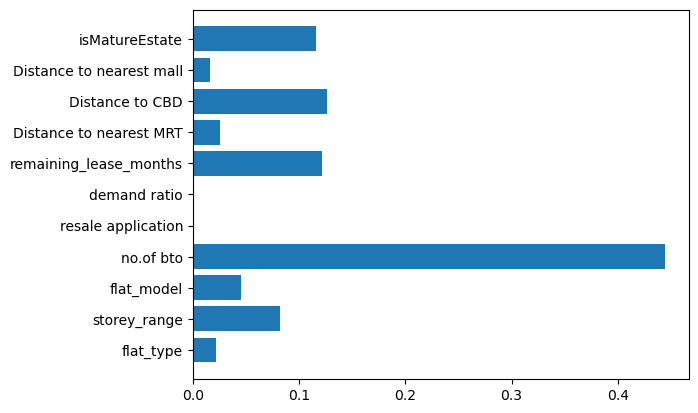

In [35]:
# find the feature importance 

plt.barh(X.columns, model.feature_importances_)


In [36]:
hdb_latest_df = hdb_latest_df.drop(["demand ratio","resale application"],axis=1)

n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.<br>
max_depth: The maximum depth of each tree, often values are between 1 and 10.<br>
eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.<br>
subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.<br>
colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.<br>

In [37]:
# xgboost with target and label encoding methods had better performance on class 0, 1, and 2, 
# and xgboost with one hot and entity embedding methods had better performance on class 0 and 4.
# Xgboost with one hot encoding and entity embedding can lead to similar model performance results.


In [39]:
# XGBoost does not support categorical variables natively, so it is necessary to encode them prior to training
hdb_latest_df

,flat_type,storey_range,flat_model,no.of bto,remaining_lease_months,Distance to nearest MRT,Distance to CBD,Distance to nearest mall,isMatureEstate,cpi_adjusted_price_per_sqm
0,0,5,10,7314,667,908.970521,9026.295266,775.593122,1,3619.754795
1,0,20,7,7314,1100,687.185319,9015.122154,561.028714,1,6695.082857
2,0,2,10,7314,676,586.980690,8949.443986,489.978660,1,3141.673973
3,0,5,10,7314,663,800.631299,9123.690385,806.304304,1,3824.646575
4,0,8,10,7314,708,927.322849,9734.443856,1059.121690,1,3226.041176
...,...,...,...,...,...,...,...,...,...,...
77829,3,8,6,20064,780,1182.415251,15623.766720,908.910361,0,6158.429452
77830,3,8,2,20064,766,661.035324,15234.077610,568.606554,0,5859.823380
77831,3,8,2,20064,766,661.035324,15234.077610,568.606554,0,5776.556939
77832,3,11,6,20064,768,573.471701,15246.853760,668.020144,0,5743.008767


# Model Tuning

<h3>Booster</h3>

General Parameters

[default=gbtree]

Select the type of model to run at each iteration. It has 2 options:

gbtree: tree-based models
gblinear: linear models

silent [default=0]:
Silent mode is activated is set to 1, i.e. no running messages will be printed.
It’s generally good to keep it 0 as the messages might help in understanding the model.

nthread [default to maximum number of threads available if not set]
This is used for parallel processing and number of cores in the system should be entered
If you wish to run on all cores, value should not be entered and algorithm will detect automatically

# Train Test Split

In [40]:
# using train_test_split
# define dataset
# scale the data 

X = hdb_latest_df.loc[:,~hdb_latest_df.columns.isin(['cpi_adjusted_price_per_sqm'])] 
y = hdb_latest_df[["cpi_adjusted_price_per_sqm"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) 


# standardise the data
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)



# rmse – root mean square error
# mae – mean absolute error
# logloss – negative log-likelihood
# error – Binary classification error rate (0.5 thresholds)
# merror – Multiclass classification error rate
# mlogloss – Multiclass logloss
# auc: Area under the curve



In [41]:
# find good K value for k-fold validation
# evaluate the model using a given test condition
def evaluate_model(cv,X_train_loo,y_train):
  # get the dataset
  ###  Independent And dependent features
  # get the model
  model = XGBRegressor(random_state=123)
  # evaluate the model
  scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  # return scores
  return std(scores)


In [42]:
folds = range(2,12)
result = []
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=123)
    # record mean and min/max of each set of results
    std_scores = evaluate_model(cv,X_train,y_train)
    # report performance
    result.append(std_scores)

KeyboardInterrupt: 

In [ ]:
optimum_fold = result.index(max(result))+2

In [20]:
optimum_fold=10

# Parameters Tuning 

In [43]:
model = XGBRegressor(random_state=123)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import r2_score
r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=optimum_fold, n_jobs=-1)
mean_squared_error = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=optimum_fold, n_jobs=-1)
print("R2 score:", mean(r2_scores))
print("RMSE:", -mean(mean_squared_error))
print("MSE", np.sqrt(-mean(mean_squared_error)))    


R2 score: 0.9301159561608972
RMSE: 0.06984052970845385
MSE 0.26427358874555335


In [44]:
import sklearn.metrics as metrics


print(metrics.r2_score(y_test, y_predict))
print(metrics.mean_squared_error(y_test,y_predict))
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))


0.923385078545501
0.07661492145449897
0.27679400545260907


In [120]:
# The alpha parameter is the L1 regularization term on weights. Larger values means more conservative model, it helps to reduce overfitting by adding a penalty term to the loss function.

from sklearn.model_selection import RandomizedSearchCV
hyperparameter_grid = {
'max_depth': [3, 5, 6],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'subsample': np.arange(0.5, 1.0, 0.1),
'colsample_bytree': np.arange(0.4, 1.0, 0.1), 
'n_estimators': [100, 500, 1000],
    }



random_cv = RandomizedSearchCV(model, hyperparameter_grid, scoring="neg_mean_squared_error", cv=optimum_fold,n_iter=25, n_jobs=-1,random_state=123)
random_cv.fit(X_train, y_train)
# Return set of parameters with the best performance
random_cv.best_params_
# Return the performance metric score
random_cv.best_score_



-0.08832205317183946

In [121]:
random_cv.best_params_

{'subsample': 0.7,
 'n_estimators': 1000,
 'max_depth': 6,
 'learning_rate': 0.3,
 'colsample_bytree': 0.8999999999999999}

In [146]:

model = XGBRegressor(learning_rate=0.1,max_depth=6,subsample=0.5,n_estimators=800,colsample_bytree=0.899999,gamma=5,  random_state=123)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=optimum_fold, n_jobs=-1)
mean_squared_error = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=optimum_fold, n_jobs=-1)
print("R2 score:", mean(r2_scores))
print("MSE:", -mean(mean_squared_error))
print("RMSE", np.sqrt(-mean(mean_squared_error)))

      

R2 score: 0.8917899061963462
MSE: 0.10816257719731297
RMSE 0.32888079481373333


In [145]:
import sklearn.metrics as metrics


print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.9125630812720428
0.08743691872795718
0.29569734311954377


In [ ]:
# learning_rate=0.1,max_depth=6,subsample=0.5,n_estimators=800,colsample_bytree=0.899999,gamma=5, random_state=123
# R2 score: 0.9117996945365572
# MSE: 0.0881492183086394
# RMSE 0.29689934036410287

# 0.9125630812720428
# 0.08743691872795718
# 0.29569734311954377

# 



In [149]:
# retrieve performance metrics
evaluation_set = [(X_train, y_train), (X_test,y_test)]
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

XGBoostError: No evaluation result, `eval_set` is not used during training.